<a href="https://colab.research.google.com/github/RUMONMD89/Data-Science-with-Python/blob/main/ADS3_Py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 3. データ準備
# 3･4･1 インデックスの付与（Python）
import pandas as pd
bank_train = pd.read_csv("bank_marketing_training.csv")
bank_train.shape
bank_train['index'] = pd.Series(range(0, 26874))
bank_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,index
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,1
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,2
3,25,services,single,high.school,no,yes,no,telephone,may,mon,222,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,3
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,137,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,4


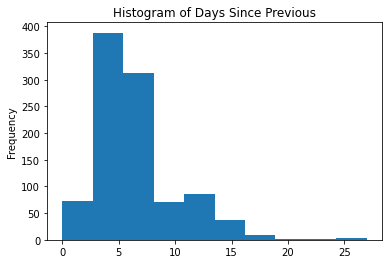

In [ ]:
# 3･5･1 モデルに悪影響をもたらす変数値の変換（Python）
import numpy as np
bank_train['days_since_previous'] = bank_train['days_since_previous'].replace({999: np.NaN})
bank_train['days_since_previous'].plot(kind='hist', title='Histogram of Days Since Previous')


In [ ]:
# 3･6･1 カテゴリ変数から数値変数の変換（Python）
bank_train['education_numeric'] = bank_train['education']
dict_edu = {"educatoin_numeric": {"illiterate": 0, "basic.4y": 4, "basic.6y": 6, "basic.9y": 9,
                                  "high.school": 12, "professional.course": 12,
                                  "university.degree": 16, "unknown": np.NaN}}
bank_train.replace(dict_edu, inplace=True)

# 3･7･1 数値変数の正規化（Python）
from scipy import stats
bank_train['age_z'] = stats.zscore(bank_train['age'])

# 3･8･1 外れ値の特定（Python）
bank_train.query('age_z > 3 | age_z < -3')
bank_train_outliers = bank_train.query('age_z > 3 | age_z < -3')
bank_train_sort = bank_train.sort_values(['age_z'], ascending=False)
bank_train_sort[['age', 'marital']].head(n=15)

,age,marital
24840,91,married
24833,91,married
26520,89,divorced
26015,89,divorced
18179,88,divorced
18181,88,divorced
18183,88,divorced
18186,88,divorced
18187,88,divorced
18188,88,divorced
